In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [236]:
df=pd.read_csv("ex2data1.txt",sep=",",engine='python')

In [237]:
# ==================== Part 1: Plotting ====================
y=df["decission"]
y_f=y.to_frame()
X=df.drop(["decission"],axis=1)

In [238]:
def plotData(X,y):
    neg=y[y==0].index
    pos=y[y==1].index
    plt.figure(figsize=(7,7))
    plt.scatter(X.iloc[pos,0],X.iloc[pos,1],marker='+',color="black",label='Admitted')
    plt.scatter(X.iloc[neg,0],X.iloc[neg,1],marker='o',color="red",label='Not Admitted')
    plt.xlabel("Exam1 Score")
    plt.ylabel("Exam2 Score")
    plt.legend(loc='upper right')
    plt.show()

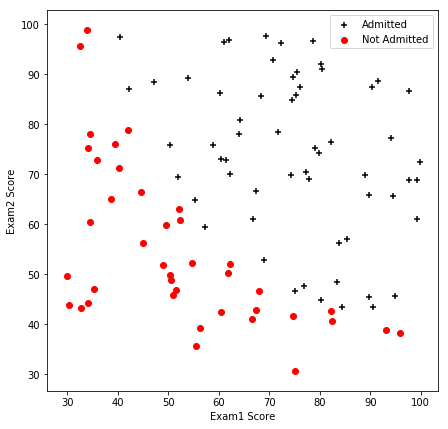

In [239]:
plotData(X,y)

In [240]:
#  ============ Part 2: Compute Cost and Gradient ============
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [241]:
ones = pd.DataFrame(np.ones((len(X), 1)))
X_1=X
X=pd.concat([ones, X], axis=1)

In [242]:
initial_theta=np.zeros((X.shape[1], 1))

In [243]:
def costFunction(theta,X,y):
    m=len(y)
    z=X.dot(theta)
    h=sigmoid(z)    
    first_term=y.T.dot(np.log(h))
    second_term=(1-y).T.dot(np.log(1-h))
    Sum=sum(first_term+second_term)
    J=(-1/m)*Sum
    return J

In [244]:
def grad(theta, X, y):
    m=len(y)
    z=X.dot(theta)
    h=sigmoid(z)
    z =h.subtract(y_f['decission'], axis=0) 
    z1=z.T.dot(X)
    grad=(1/m)*(z1)
    return grad

In [245]:
#  ============= Part 3: Optimizing using fmin_bfgs  =============
theta= opt.fmin_bfgs(costFunction, initial_theta, fprime=grad, args=(X, y_f))
print('Expected cost (approx): 0.203');
print('theta: ',theta);
print('Expected theta (approx):  [-25.161 0.206  0.201 ]');

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
Expected cost (approx): 0.203
theta:  [-25.16133284   0.2062317    0.2014716 ]
Expected theta (approx):  [-25.161 0.206  0.201 ]


/home/mehtasham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [246]:
# Plot Decission Boundary
def plotDecissionBoundary(X,y,theta):
    neg=y[y==0].index
    pos=y[y==1].index
    plt.figure(figsize=(7,7))
   
    x_values = [np.min(X.iloc[:, 1]), np.max(X.iloc[:, 2])]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.scatter(X.iloc[pos,1],X.iloc[pos,2],marker='+',color="black",label='Admitted')
    plt.scatter(X.iloc[neg,1],X.iloc[neg,2],marker='o',color="red",label='Not Admitted')

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel("Exam1 Score")
    plt.ylabel("Exam2 Score")
    plt.legend(loc='upper right')
    plt.show()


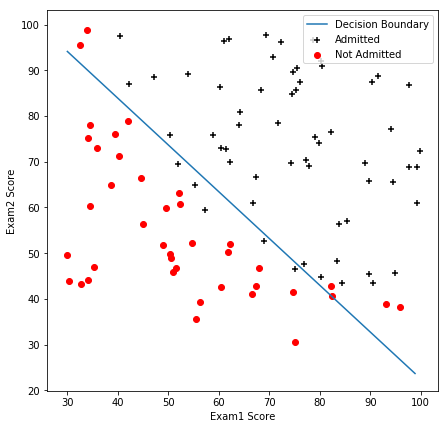

In [247]:
plotDecissionBoundary(X,y,theta)

In [248]:
# ============== Part 4: Predict and Accuracies ==============
prob = sigmoid(np.array([1, 45, 85]).T.dot(theta));
print('For a student with scores 45 and 85, we predict an admission probability of: ', prob);
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of:  0.7762907240588947
Expected value: 0.775 +/- 0.002


In [249]:
def predict(theta,X):
    m=len(X.iloc[:,1])
    p=np.zeros([m,1])
    h=sigmoid(X.dot(theta))
    for i in range(m):
        if(h[i]>=0.5):
            p[i]=1
        else:
            p[i]=0
    return p

In [250]:
p=predict(theta,X)
print('Train Accuracy: ', np.mean(p.T == np.array(y)) * 100);
print('Expected accuracy (approx): 89.0');

Train Accuracy:  89.0
Expected accuracy (approx): 89.0
